In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
from tensorflow.python.framework.ops import reset_default_graph
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
mnist = input_data.read_data_sets("/tmp/data/",one_hot = True)
n_classes = 10

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [8]:
batch_size = 100
training = 1000
validing = 200
testing = 50

In [3]:
x = tf.placeholder('float',[None,784])
y = tf.placeholder('float')
keep_rate = 0.8
keep_prob = tf.placeholder(tf.float32)

In [4]:
def conv2d(x,W):
    return tf.nn.conv2d(x, W, strides = [1,1,1,1], padding = 'SAME')
def maxpool2d(x):
    return tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding = 'SAME')

In [5]:
def convolution_nn(x):
    weights = {'W_conv1':tf.Variable(tf.random_normal([5,5,1,32])),
               'W_conv2':tf.Variable(tf.random_normal([5,5,32,64])),
               'W_fc':tf.Variable(tf.random_normal([7*7*64,1024])),
               'out':tf.Variable(tf.random_normal([1024, n_classes]))}

    biases = {'b_conv1':tf.Variable(tf.random_normal([32])),
               'b_conv2':tf.Variable(tf.random_normal([64])),
               'b_fc':tf.Variable(tf.random_normal([1024])),
               'out':tf.Variable(tf.random_normal([n_classes]))}
    
    x = tf.reshape(x,shape = [-1,28,28,1])
    
    conv1 = tf.nn.relu(conv2d(x,weights['W_conv1'])+biases['b_conv1'])
    conv1 = maxpool2d(conv1)
    conv2 = tf.nn.relu(conv2d(conv1, weights['W_conv2']) + biases['b_conv2'])
    conv2 = maxpool2d(conv2)
    
    fc = tf.reshape(conv2,[-1,7*7*64])
    fc = tf.nn.relu(tf.matmul(fc,weights['W_fc'])+biases['b_fc'])
    
    fc = tf.nn.dropout(fc,keep_rate)
    
    output = tf.matmul(fc,weights['out'])+biases['out']
    
    return output

In [41]:
def train_nn(x):
    prediction = convolution_nn(x)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(prediction,y))
    optimizer = tf.train.AdamOptimizer().minimize(cost)
    
    correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
    
    hm_epoches = 5
    train = []
    valid = []
    with tf.Session() as sess:
        sess.run(tf.initialize_all_variables())
        for epoch in range(hm_epoches):
            epoch_loss = 0
            for i in range(int(training/batch_size)):
                epoch_x = mnist.train.images[:training][:batch_size*(i+1)]
                epoch_y = mnist.train.labels[:training][:batch_size*(i+1)]
                _,c = sess.run([optimizer,cost],feed_dict = {x:epoch_x,y:epoch_y})
                epoch_loss += c
            train_acc = accuracy.eval({x:mnist.train.images[:training], y:mnist.train.labels[:training]})
            valid_acc = accuracy.eval({x:mnist.validation.images[:validing], y:mnist.validation.labels[:validing]})
            train += [train_acc]
            valid += [valid_acc]
            print('Epoch:',epoch+1, 'loss:',epoch_loss,'train_acc:',train_acc,'valid_acc:',valid_acc)
    
        plt.figure()
        plt.plot(np.arange(len(train)),train,'r',valid,'b')
        plt.legend(['train','valid'])
        test_acc = accuracy.eval({x:mnist.test.images[:testing], y:mnist.test.labels[:testing]})
        print('test_acc:',test_acc)

Epoch: 1 loss: 592182.882812 train_acc: 0.17 valid_acc: 0.185
Epoch: 2 loss: 287962.087891 train_acc: 0.398 valid_acc: 0.35
Epoch: 3 loss: 160754.088867 train_acc: 0.55 valid_acc: 0.53
Epoch: 4 loss: 93025.2666016 train_acc: 0.647 valid_acc: 0.585
Epoch: 5 loss: 67111.2797852 train_acc: 0.725 valid_acc: 0.68
test_acc: 0.74


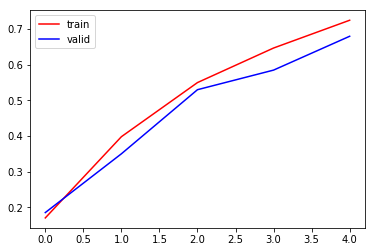

In [42]:
train_nn(x)

In [45]:
a = 1000000000
for i in range(1000000):
    a = a + 1e-6
print(a-1000000000)    

0.95367431640625
